# Morfologia Matemática

Nesta aula iremos praticar o uso de operadores morfológicos para processar imagens. Como visto na expositiva, a grande ideia de Morfologia é filtrar imagens baseado em um padrão visual chamado elemento estruturante. Em teoria precisamos de apenas 4 operações para representar qualquer operador morfológico:

* Dilatação: "cresce" a imagem baseado no formato do elemento estruturante
* Erosão: "emagrece" a imagem baseado no formato do elemento estruturante
* Complemento: nega todos os pixels da imagem (o que é branco vira preto e vice versa)
* Subtração: subtrai de uma imagem os valores dos pixels da outra


Ao combinar essas operações conseguimos criar processamentos complexos. Algumas dessas combinações são "famosas" e tem nomes específicos. Nossa prática estará focada em 4 partes:

1. Escolha de elementos estruturantes
1. Combinações de operadores
1. Filtragens envolvendo componentes conexas
1. Aplicação prática

Nossa prática será baseada na biblioteca [scikit-image](https://scikit-image.org). Antes de iniciar os exercícios práticos, leia com atenção a página [Getting Started](https://scikit-image.org/docs/dev/user_guide/getting_started.html) e explore um pouco o [guia de uso](https://scikit-image.org/docs/0.15.x/user_guide.html), a [seção de exemplos](https://scikit-image.org/docs/0.15.x/auto_examples/index.html) e a documentação dos [módulos disponíveis](https://scikit-image.org/docs/0.15.x/api/api.html).


## Parte 1 - o efeito dos elementos estruturantes

Em geral utilizamos bibliotecas contendo uma gama de operadores morfológicos e focamos em parametrizá-los corretamente. Por isso, iremos iniciar nossa prática em morfologia com alguns experimentos em que testamos diferentes elementos estruturantes e observamos seus efeitos nas imagens de saída. Para efeitos didáticos a maioria das imagens processadas serão binárias. Porém, todos os operadores testados funcionam também em imagens níveis de cinza. 

**Exercício 0**: Carregue a imagem *parte1.png* e mostre-a abaixo.

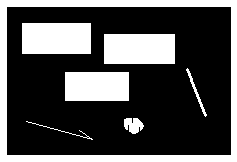

In [1]:
%matplotlib inline
import skimage
import skimage.morphology
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = os.path.join("/home/paulo/Documents/visao_comp/aula4", 'parte1.png')
image = skimage.io.imread(image, as_gray=True)

def ski_plot(img):

    plt.figure(figsize=(4, 4))
    plt.imshow(img, cmap='gray', interpolation='nearest')
    plt.axis('off')
    plt.show()
    
ski_plot(image)

**Exercício 1**: O `skimage` provê uma série de funções para criar elementos estruturantes. Liste abaixo as funções disponibilizadas.

**Exercício 2**: Faça a dilatação da imagem acima por um quadrado $3\times 3$. Plote abaixo. O que acontece com as formas da imagem?

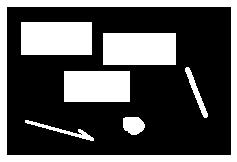

In [2]:
dilation = skimage.morphology.binary_dilation(image,skimage.morphology.square(3))

plt.figure(figsize=(4, 4))
plt.imshow(dilation, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.show()

**Exercício 3**: Faça a erosão da imagem acima por um quadrado $3\times 3$. Plote abaixo. O que acontece com as formas da imagem?

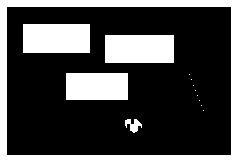

In [3]:
eroded = skimage.morphology.binary_erosion(image,skimage.morphology.square(3))

plt.figure(figsize=(4, 4))
plt.imshow(eroded, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.show()

**Exercício 4**: Faça a dilatação da imagem acima por um retângulo horizontal $1\times 11$. Plote abaixo. O que acontece com as formas da imagem?

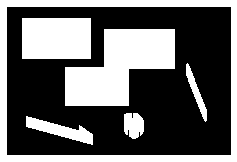

In [4]:
dilation2 = skimage.morphology.binary_dilation(image,skimage.morphology.rectangle(11, 1))

ski_plot(dilation2)

**Exercício 5**: Faça a erosão da imagem acima por um retângulo vertical $11\times 1$. Plote abaixo. O que acontece com as formas da imagem?

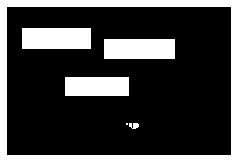

In [5]:
eroded2 = skimage.morphology.binary_erosion(image,skimage.morphology.rectangle(11, 1))

ski_plot(eroded2)

**Exercício 6**: Faça um resumo das possibilidades exploradas acima. 

# Parte 2 - combinando operadores morfológicos

Agora que já experimentamos algumas combinações de operadores morfológicos vamos estudar algumas combinações "famosas" por serem úteis em grande quantidade de situações. Iremos aplicar as operações na imagem *parte2.png*

Vamos usar as seguintes notações:

* $\delta$ representa uma dilatação
* $\varepsilon$ representa uma erosão
* $^C$ representa o complemento
* $-$ representa subtração entre imagens. 

Toda imagem será representada por uma letra maiúscula. Adicionaremos um índice abaixo das operações de dilatação e erosão para mostrar o formato do elemento estruturante usado. Ou seja, $\delta_{3\times 1}$ representa a dilatação por um elemento estruturante de 3 linhas e uma coluna.

## Bordas --  gradiente morfológico

Existe uma versão morfológica de filtro de bordas. Já vimos nas aulas anteriores alguns métodos, então esse servirá como complemento e pode ser útil em diversas situações. 

Carregue a imagem de exemplo `camera` ($C$) e calcule a imagem de bordas $B$

$B = \delta_{3\times 3}(C) - \epsilon_{3\times 3}(C)$

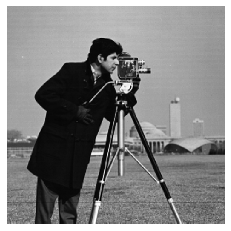

In [6]:
camera = skimage.data.camera()
ski_plot(camera)

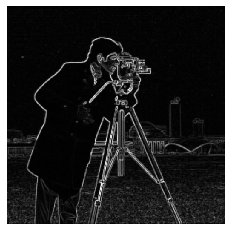

In [7]:

bordas = skimage.morphology.dilation(camera,skimage.morphology.square(3)) - skimage.morphology.erosion(camera,skimage.morphology.square(3))
ski_plot(bordas)

### Abertura

Esta operação consiste em fazer primeiro a erosão por um elemento estruturante $e$ e depois a dilatação pelo mesmo elemento estruturante. 

$R_e = \delta(\varepsilon_e(A))$

Isto tem o efeito de eliminar pontos brancos da imagem e de conectar partes pretas da imagem. 

**Exercício**: Pesquise no `skimage` como fazer esta operação e aplique-a na imagem desta seção com dois elementos estruturantes diferentes. Um deles deverá ser um quadrado $3\times 3$. Escolha o outro para manter as linhas brancas do documento. 

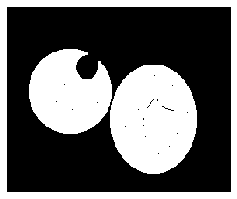

In [8]:
parte2 = os.path.join("/home/paulo/Documents/visao_comp/aula4", 'parte2.png')
parte2 = skimage.io.imread(parte2, as_gray=True)

ski_plot(skimage.morphology.opening(parte2,skimage.morphology.square(3)))

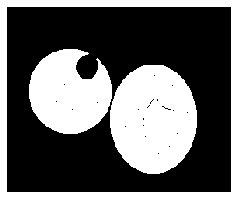

In [9]:
ski_plot(skimage.morphology.opening(parte2,skimage.morphology.disk(1)))

**Exercício**: O que acontece com as bolas no primeiro caso? E com as linhas? E com os ruídos?

### Fechamento

Esta operação consiste em fazer primeiro a dilatação por um elemento estruturante $e$ e depois a erosão pelo mesmo elemento estruturante. 

$R_e = \varepsilon_e(\delta_e(A))$

Isto tem o efeito de fechar buracos menores que $e$ e de juntar componentes conexas mais próximas que $e$.

**Exercício**: Pesquise no `skimage` como fazer esta operação e aplique-a na imagem desta seção com dois elementos estruturantes diferentes. Um deles deverá ser um quadrado $3\times 3$. Tente escolher o outro de modo a fechar o buraco redondo. 

**Exercício**: O que acontece com as bolas no primeiro caso? E com as linhas? E com os ruídos?

### Reconstrução (por dilatação)

Como vemos acima, por vezes nossas operações perdem pedaços dos objetos. A operação de reconstrução morfológica reconstrói os objetos a partir de pedaços que tenham sobrado na imagem. Este é um algoritmo iterativo para recuperar os componentes conexos de uma imagem original $M$ a partir de uma imagem filtrada $A$.

1. $R_0 = A$
1. `enquanto` $R_i \neq R_{i-1}$
    * $R_{i+1} = \delta_(R_i) \cap M$

Usamos a operação $\cap$ acima para representar o **E** booleano entre as imagens.

**Exercício**: Pesquise como fazer esta operação usando `skimage` e use-a para restaurar o pedaço do círculo que foi eliminado na abertura. 

**Exercício**: É possível fazer reconstrução também com erosões. Qual seria o efeito disto? Teste esse efeito nos resultados das operações acima.

----------------

Agora que você já experimentou fazer erosões e dilatações com alguns elementos estruturantes e também fez algumas combinações mais complexas,  vamos fazer uma aplicação prática simples. Considerando as imagem abaixo, faça as segmentações e processamentos propostos nos exercícios.

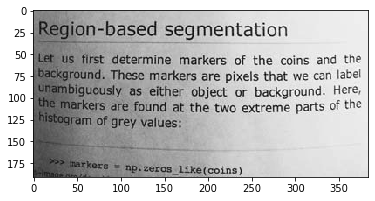

In [12]:
page = skimage.data.page()
plt.imshow(page, cmap=plt.cm.gray)

**Exercício 0**: Converta a imagem para binário. 

Existem vários métodos de binarização disponíveis no scikit-image ([tutorial](https://scikit-image.org/docs/dev/auto_examples/applications/plot_thresholding.html#sphx-glr-auto-examples-applications-plot-thresholding-py)). O usado na aula `02` foi o [threshold_local](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.threshold_local)). Leia sua documentação e mexa em seus parâmetros até conseguir uma imagem boa.

**Exercício 1**: imagens binarizadas costumam ficar cheias de ruído. Limpe a imagem. 

**Exercício 2**: Segmente as duas linhas horizontais presentes na imagem. Isto significa que você deverá eliminar da image tudo menos as duas linhas horizontais

**Exercício 3**: Junte as letras das palavras do texto. Ou seja, cada palavra do texto deverá formar um componente conexo.

**Exercício 4**: Com base na imagem acima, junte as palavras de uma mesma linha em um só componente conexo

**Exercício 5**: Segmente o título da página. Sua imagem final deverá ter eliminado tudo o que não for o título. 

# Parte 3 - componentes conexos e filtragem por área

Em todos os exemplos anteriores trabalhamos com um elemento estruturante fixo que representava um formato ou padrão visual presente nas imagens. Uma outra possibilidade é trabalhar com propriedades das formas, como área ou conectividade.

**Definição**: dada uma imagem binária I, dois pixels brancos $p_0$ e $p_n$ pertencem a um mesmo componente conexo se existe uma sequência de pixels $(p_0, p_1, \dots, p_n)$ tal que $p_i$ e $p_{i-1}$ sejam vizinhos e tenham a cor branca.

Ou seja, um componente conexo é o conjunto de todos os pontos que formam cada grupo de pontos brancos em uma imagem binária! Podemos fazer nossas filtragens baseadas em propriedades como forma e área de componentes conexos como um todo. Veja abaixo possibilidades de processamentos envolvendo componentes conexos:

* Selecionar como objeto de interesse o maior componente conexo da imagem
* Considerar ruído todos os componentes conexos com área menor que um certo valor
* Calcular o aspecto e procurar por componentes conexos "quadrados"

Vamos agora voltar ao exemplo da segmentação da página. 

**Exercício 0**: veja a documentação da função [label](https://scikit-image.org/docs/dev/api/skimage.morphology.html#label) e aplique-a na imagem binarizada da página. Para mostrar seus resultados você pode chamar a função [label2rgb](https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.label2rgb). 

**Exercício 1**: A função [regionprops](https://scikit-image.org/docs/dev/api/skimage.measure.html#regionprops) é usada para calcular propriedades das regiões encontradas usando `labels`. Leia sua documentação e aplique-a na imagem obtida no exercício anterior. Com base no retorno dessa função, mostre 

* a área média dos componentes conexos
* a maior altura
* a maior largura

**Exercício 2**: Selecione o componente conexo mais largo. Crie uma imagem binária que contenha somente este componente. *Dica*: o atributo `label` relaciona uma região retornada por `regionprops` aos pixels rotulados na imagem retornada por `labels`. 

**Exercício 3**: Segmente o título da imagem com base nos componentes conexos retornados no exercício 1.

**Exercício 4**: Compute a largura média das regiões da imagem e mantenha somente as que estiverem a um desvio padrão da média. Que efeito isto tem?

**Exercício 5**: Segmente somente as letras maiúsculas do texto. Você consegue fazer isso com base no exercício acima?

# Parte 4 - aplicação prática

Agora que já temos um feeling de como trabalhar com operadores morfológicos iremos trabalhar em um pequeno projeto prático: a leitura de imagens de sudoku. Nossas imagens são livres e estaremos assumindo somente que:

1. existe um sudoku na imagem
1. o sudoku não tem muita inclinação 

Com isto posto, crie um programa que recorta a imagem do sudoku da foto, identifica todos os quadradinhos do tabuleiro, os agrupa nos pequenos quadrados $3\times 3$ e detecta quais regiões estão preenchidas e quais estão livres.